<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML%20III-Module%202%20Lab2%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises

1)**How many components do you need to retain 90% of the variance in the data?**

Features: (569, 30)
Target: (569, 1)
(569, 30) (569,)
1.0
Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]
Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]
Explained variance:
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797

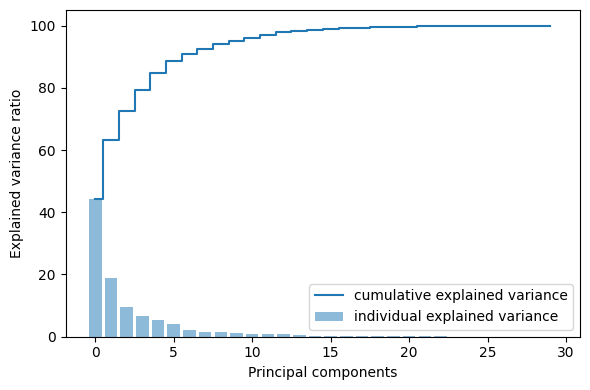

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]
[[ 9.19283681  1.94858315 -1.12318261]
 [ 2.38780181 -3.76817186 -0.52927601]
 [ 5.73389629 -1.07517392 -0.5517282 ]
 ...
 [ 1.25617928 -1.90229675  0.56273706]
 [10.37479405  1.67201032 -1.87705316]
 [-5.47524334 -0.67063635  1.49038902]]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape)
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat[0:5, 0:5])
cov_mat_numpy = np.cov(X_std.T)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals.shape, eig_vecs.shape
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

# Find the number of components needed to explain 90% of the variance
n_components_90 = next(i for i, cumulative_variance in enumerate(cum_var_exp) if cumulative_variance >= 90) + 1
print(f"Number of components needed to retain 90% of the variance: {n_components_90}")

# Plotting the variance explained by each component and the cumulative variance explained

plt.figure(figsize=(6 , 4))
plt.bar(range(30), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(30), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)

print(Y)
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head()
import plotly.graph_objects as go
import plotly.express as px
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")


In [3]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)


Cumulative explained variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


In [4]:

n_components_90 = next(i for i, cumulative_variance in enumerate(cum_var_exp) if cumulative_variance >= 90) + 1
print(f"Number of components needed to retain 90% of the variance: {n_components_90}")


Number of components needed to retain 90% of the variance: 7


2)**Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.t**

One common use case of Principal Component Analysis (PCA) is in the field of image compression.

Summarization:


An image can be represented as a matrix where each element corresponds to the pixel intensity value. For a grayscale image, this matrix will have dimensions corresponding to the height and width of the image. For a color image, it will have three such matrices, one for each color channel (R, G, B).

The pixel intensity values are standardized to have a mean of zero and a standard deviation of one. This step ensures that the PCA treats all pixels equally.

The covariance matrix of the standardized pixel values is computed. This matrix captures the variance and the correlation between different pixels in the image.

Eigenvalues and eigenvectors of the covariance matrix are computed. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the amount of variance captured by each principal component.

A subset of principal components is selected based on the cumulative explained variance. Typically, the number of components chosen is enough to retain a desired level of variance (e.g., 90% or 95%).

The original image data is projected onto the selected principal components, transforming it into a lower-dimensional space. This step results in a compressed representation of the image.

To reconstruct the image, the lower-dimensional data is projected back to the original space using the principal components. The reconstructed image may not be identical to the original, but it retains most of the significant features.







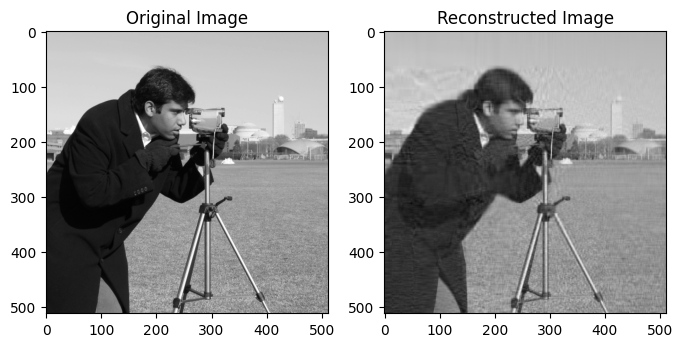

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import data

# Load a sample image (grayscale)
image = data.camera()

# Standardize the image data
scaler = StandardScaler()
image_std = scaler.fit_transform(image)

# Apply PCA to the standardized image
pca = PCA(n_components=50)  # Retain 50 principal components
image_pca = pca.fit_transform(image_std)

# Inverse transform to reconstruct the image
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = scaler.inverse_transform(image_reconstructed)

# Plot original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(image_reconstructed, cmap='gray')
plt.show()
